<a href="https://colab.research.google.com/github/ditorizkyka/TA-Pothole-Detection-Computer-Vision/blob/main/TA_YOLOv10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv10 Pothole Detection (Comparison Model)
Bagian ini menjelaskan implementasi model YOLOv10 sebagai model pembanding (comparison model) dalam tugas deteksi lubang jalan. YOLOv10 dipilih karena desainnya yang efisien dan lightweight, sehingga memungkinkan analisis perbandingan antara kecepatan inferensi dan kualitas fitur dibandingkan model utama.


# Experimental Setup
Bagian ini menjelaskan konfigurasi lingkungan eksperimen yang digunakan untuk pelatihan dan evaluasi model YOLOv10. Penjelasan mencakup platform komputasi, spesifikasi perangkat keras, serta framework dan dependensi yang digunakan. Seluruh setup dibuat identik dengan model utama untuk memastikan perbandingan performa yang adil dan objektif.

In [ ]:
!nvidia-smi

!pip install ultralytics wandb


Sat Nov  8 12:56:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection (Pengumpulan Data)

Bagian ini menguraikan dataset yang digunakan dalam eksperimen YOLOv10, termasuk sumber data, jumlah citra, dan karakteristik dataset seperti variasi kondisi pencahayaan dan tekstur permukaan jalan. Dataset yang digunakan sama dengan model utama untuk menjaga konsistensi evaluasi.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0g1oLVsmKRymF1NXsqeU")
project = rf.workspace("arthana-dbw2b").project("pothole-detection-th8es")
version = project.version(9)
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-detection-9 in yolov9:: 100%|██████████| 8474/8474 [00:01<00:00, 5790.16it/s]


# Data Splitting (Pembagian Data)

Bagian ini menjelaskan strategi pembagian dataset menjadi data latih, validasi, dan pengujian. Pembagian dilakukan dengan proporsi yang sama seperti pada model utama guna memastikan bahwa perbedaan hasil yang diperoleh benar-benar disebabkan oleh arsitektur model, bukan oleh perbedaan data.

In [ ]:
import os

for split in ["train","valid","test"]:
    print(split, len(os.listdir(f"Pothole-detection-9/{split}/images")))

train 3028
valid 670
test 533


In [ ]:
os.listdir(f"Pothole-detection-9/train/images")

['20240223_125533_mp4-1592_jpg.rf.ca368059e1a3810df33d3f804c99a408.jpg',
 'IMG_1892_MOV-0300_jpg.rf.283bfe7b9d69da177028011a0a6abbe4.jpg',
 '20240223_125533_mp4-0720_jpg.rf.924c0c9838ab4e07772416d4d1cebfae.jpg',
 '20240223_125533_mp4-0523_jpg.rf.fb2266a4bbfdd776d04d0023446045d1.jpg',
 'IMG_1891_MOV-0012_jpg.rf.08b5149c9ad7dc8121a4d0493361010b.jpg',
 '20240223_124911_mp4-2140_jpg.rf.182ef109a35a001cdd8ae6796ddaf442.jpg',
 '20240220_062814_mp4-0644_jpg.rf.9671e950f1130f740de14323dc31be62.jpg',
 '20240223_124911_mp4-0793_jpg.rf.f8b8250409ac6939a3ee5b066eeeddcc.jpg',
 'IMG_1890_MOV-0614_jpg.rf.acadf97f9727b994d87bac4feb75673d.jpg',
 '20240223_125533_mp4-0261_jpg.rf.98c2db77cc06a29509688c0a8362811a.jpg',
 '20240223_125533_mp4-0323_jpg.rf.64f0f0968eb41e286ffa1b1d805db465.jpg',
 'IMG_1890_MOV-0593_jpg.rf.85dc0d9e292fbbcbf9acacb545915e86.jpg',
 'IMG_1889_MOV-0119_jpg.rf.71ad52fbd7bd0839453f2809b6f64087.jpg',
 '20240223_125533_mp4-0565_jpg.rf.db98eece04f9a1b8c6a3f9f9cffaefc7.jpg',
 '20240223_12

In [ ]:
!cat Pothole-detection-9/data.yaml

names:
- Pothole-
nc: 1
roboflow:
  license: CC BY 4.0
  project: pothole-detection-th8es
  url: https://universe.roboflow.com/arthana-dbw2b/pothole-detection-th8es/dataset/9
  version: 9
  workspace: arthana-dbw2b
test: ../test/images
train: ../train/images
val: ../valid/images


# Model Training (Default Parameter / Baseline)

Bagian ini menjelaskan proses pelatihan awal YOLOv10 menggunakan parameter default tanpa optimasi tambahan. Hasil dari tahap ini digunakan sebagai baseline performance untuk mengamati kemampuan awal YOLOv10 dalam mendeteksi lubang jalan sebelum dilakukan tuning lebih lanjut.

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov10s.pt")

model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    optimizer="SGD",
    lr0=0.01,           # 🔹 laju belajar standar, cepat konvergen
    lrf=0.01,           # 🔹 decay cepat → cocok untuk baseline seimbang
    momentum=0.9,       # 🔹 stabil tapi masih adaptif
    weight_decay=0.0008,# 🔹 regularisasi ringan, hindari underfit
    close_mosaic=10,    # 🔹 hentikan mosaic lebih awal → hasil lebih realistis
    project="pothole_exp",
    name="yolov10s_exp1"
)

New https://pypi.org/project/ultralytics/8.3.219 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=yolov10s_exp1, nbs=64, nms=False, op

Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 270, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 427, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 384, in _send
    n = write(self._handle, buf)
        ^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exc

optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0008), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/pothole_exp/yolov10s_exp1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/50      4.71G      2.659       11.3      2.663          3        640: 100% ━━━━━━━━━━━━ 190/190 2.6it/s 1:13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 3.2it/s 6.7s
                   all        670        786      0.517      0.487      0.486      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      5.04G      2.419      2.358      2.298          7        640: 100% ━━━━━━━━━━━━ 190/190 2.7it/s 1:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 3

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79acb9c19070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Hyperparameter Tuning

Bagian ini membahas proses penyesuaian hyperparameter YOLOv10 untuk meningkatkan performa deteksi. Parameter seperti learning rate, batch size, dan jumlah epoch diatur secara bertahap untuk mengamati pengaruhnya terhadap akurasi, stabilitas pelatihan, dan efisiensi komputasi.

In [ ]:
import os
import time
import shutil
from pathlib import Path
from ultralytics import YOLO, RTDETR

# ====== KONFIGURASI DASAR ======
DATA = "Pothole-detection-9/data.yaml"
DRIVE_DIR = "/content/drive/MyDrive/09 LMS TELKOM UNIVERSITY/TAHUN 4/Download/00-TA/GRID SEARCH"

# Buat folder penyimpanan hasil
os.makedirs(DRIVE_DIR, exist_ok=True)
print(f"📁 Drive folder siap: {DRIVE_DIR}")

# Argumen umum
COMMON_ARGS = dict(
    optimizer="AdamW",       # ✅ Optimizer yang cocok untuk RT-DETR / Transformer-based
    weight_decay=5e-4,
    project="pothole_grid_adamw",
    seed=42,
    device=0
)

📁 Drive folder siap: /content/drive/MyDrive/09 LMS TELKOM UNIVERSITY/TAHUN 4/Download/00-TA/GRID SEARCH


# Tuning with Grid method

In [ ]:
# Kombinasi eksperimen (2 epoch dulu untuk uji coba)
experiments = [
    {"batch": 8, "lr0": 0.001, "epochs":80, "name": "y10s_bs8_lr001_ep80_adamw"},
    {"batch": 8, "lr0": 0.0001, "epochs": 80, "name": "y10s_bs8_lr0001_ep80_adamw"},
    {"batch": 16, "lr0": 0.001, "epochs": 80, "name": "y10s_bs16_lr001_ep80_adamw"},
    {"batch": 16, "lr0": 0.0001, "epochs": 80, "name": "y10s_bs16_lr0001_ep80_adamw"},
]

# Jalankan semua kombinasi
for exp in experiments:
    # ✅ Load model sekali saja
    model = YOLO("yolov10s.pt")
    print(f"\n🚀 Mulai training: {exp['name']}")
    start = time.time()

    results = model.train(
        model="yolov10s.pt",   # ✅ tambahkan ini biar gak KeyError
        data=DATA,
        batch=exp["batch"],
        epochs=exp["epochs"],
        lr0=exp["lr0"],
        name=exp["name"],
        **COMMON_ARGS
    )

    end = time.time()
    durasi = (end - start) / 60
    print(f"✅ Selesai: {exp['name']} dalam {durasi:.2f} menit")

    # Simpan hasil ke Google Drive
    local_dir = Path(results.save_dir)
    drive_dest = Path(DRIVE_DIR) / local_dir.name
    shutil.copytree(local_dir, drive_dest, dirs_exist_ok=True)
    print(f"📂 Hasil disalin ke: {drive_dest}")



🚀 Mulai training: y10s_bs8_lr001_ep80_adamw
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y10s_bs8_lr001_ep80_adamw, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, ove

In [ ]:
from ultralytics import YOLO

# model = YOLO("yolov10s.pt")

# # train
# model.train(
#     data="Pothole-detection-9/data.yaml",
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     project="pothole_exp",
#     name="yolov10_poc"
# )

from ultralytics import YOLO
model = YOLO("yolov10s.pt")

#  EXPERIMENT 3
model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    optimizer="AdamW",
    lr0=0.002,          # 🔹 learning rate awal kecil → stabil di kondisi sulit
    lrf=0.10,           # 🔹 decay lambat → tetap belajar di akhir
    momentum=0.937,     # 🔹 menjaga stabilitas gradien
    weight_decay=0.01,  # 🔹 regularisasi kuat → kurangi overfit
    close_mosaic=12,    # 🔹 hentikan augmentasi di akhir → precision naik
    project="pothole_exp",
    name="yolov10_exp3"
)



Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=12, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10_exp32, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79ad08ab6e40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Model Testing and Metrics Evaluation

Bagian ini menjelaskan proses pengujian akhir YOLOv10 menggunakan data uji. Evaluasi performa dilakukan menggunakan metrik standar deteksi objek, seperti Precision, Recall, mAP@0.5, mAP@0.5:0.95, serta waktu inferensi, untuk membandingkan hasil YOLOv10 dengan model utama.

In [ ]:
# --- 🧪 TESTING & EVALUASI MODEL BASELINE (FIXED) ---
from ultralytics import YOLO
import time, glob, pandas as pd

# 1️⃣ Load model terbaik
model = YOLO("pothole_exp/yolov10s_exp1/weights/best.pt")

# 2️⃣ Hitung waktu inferensi total di test set
test_images = glob.glob("Pothole-detection-9/test/images/*")
start_time = time.time()
results_test = model.val(data="Pothole-detection-9/data.yaml", split="test")
total_time = time.time() - start_time
inference_time = total_time / len(test_images) if len(test_images) > 0 else 0

# 3️⃣ Ambil metrik evaluasi utama
metrics = results_test.results_dict
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
map50 = metrics.get("metrics/mAP50(B)", 0)
map5095 = metrics.get("metrics/mAP50-95(B)", 0)

print("\n📊 HASIL EVALUASI BASELINE (TEST SET):")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"mAP@0.5       : {map50:.4f}")
print(f"mAP@0.5:0.95  : {map5095:.4f}")
print(f"Inference Time: {inference_time:.4f} detik/gambar")

# 4️⃣ Simpan hasil metrik ke CSV
pd.DataFrame([{
    "Precision": precision,
    "Recall": recall,
    "mAP@0.5": map50,
    "mAP@0.5:0.95": map5095,
    "Inference Time (s/img)": inference_time
}]).to_csv("baseline_metrics.csv", index=False)

print("\n✅ Hasil evaluasi baseline berhasil disimpan ke 'baseline_metrics.csv'")


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,218,387 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 985.1±440.5 MB/s, size: 50.3 KB)
val: Scanning /content/Pothole-detection-9/test/labels.cache... 533 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 533/533 1.0Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 641. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 4.0it/s 8.5s
                   all        533        641      0.792       0.69      0.739      0.354
Speed: 2.0ms preprocess, 9.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /content/runs/detect/

# Result Analysis and Visualization

Bagian ini menyajikan analisis hasil eksperimen YOLOv10 secara kuantitatif dan kualitatif. Visualisasi berupa grafik performa dan contoh hasil deteksi digunakan untuk menunjukkan kekuatan dan keterbatasan YOLOv10, terutama dalam mendeteksi objek kecil dan kompleks.

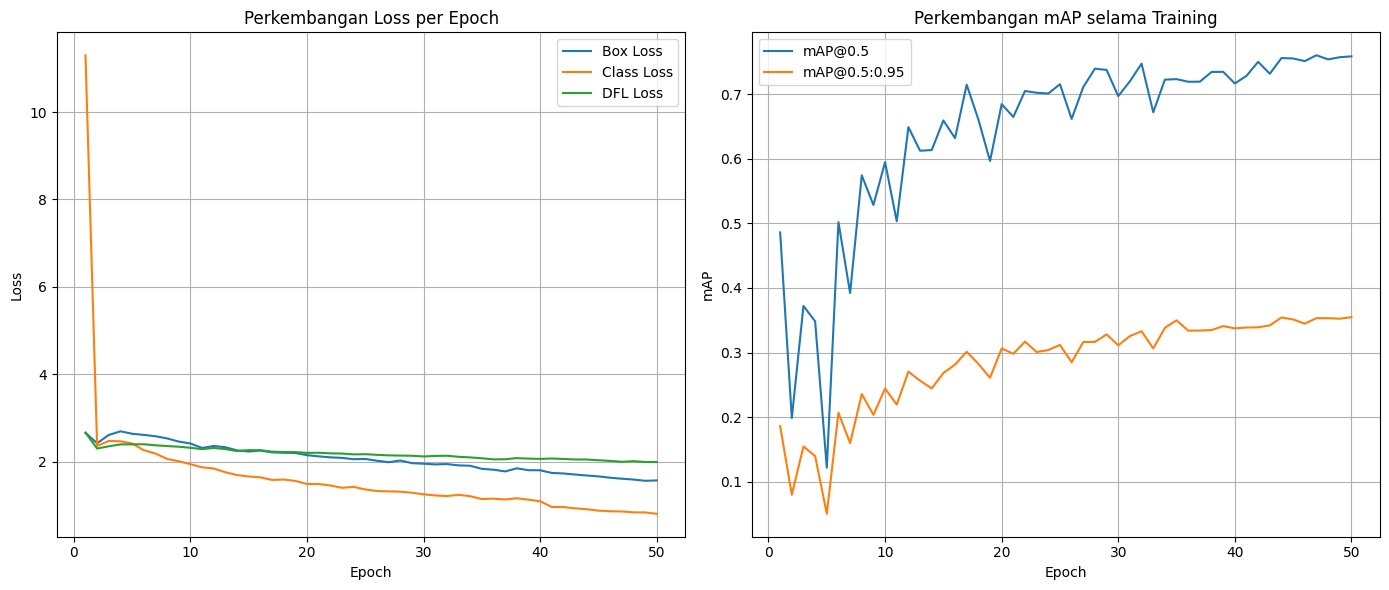

In [ ]:
# --- 📉 VISUALISASI HASIL TRAINING BASELINE ---
results_path = "pothole_exp/yolov10s_exp1/results.csv"
df = pd.read_csv(results_path)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.title("Perkembangan Loss per Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid()

plt.subplot(1,2,2)
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.title("Perkembangan mAP selama Training")
plt.xlabel("Epoch"); plt.ylabel("mAP"); plt.legend(); plt.grid()

plt.tight_layout()
plt.show()


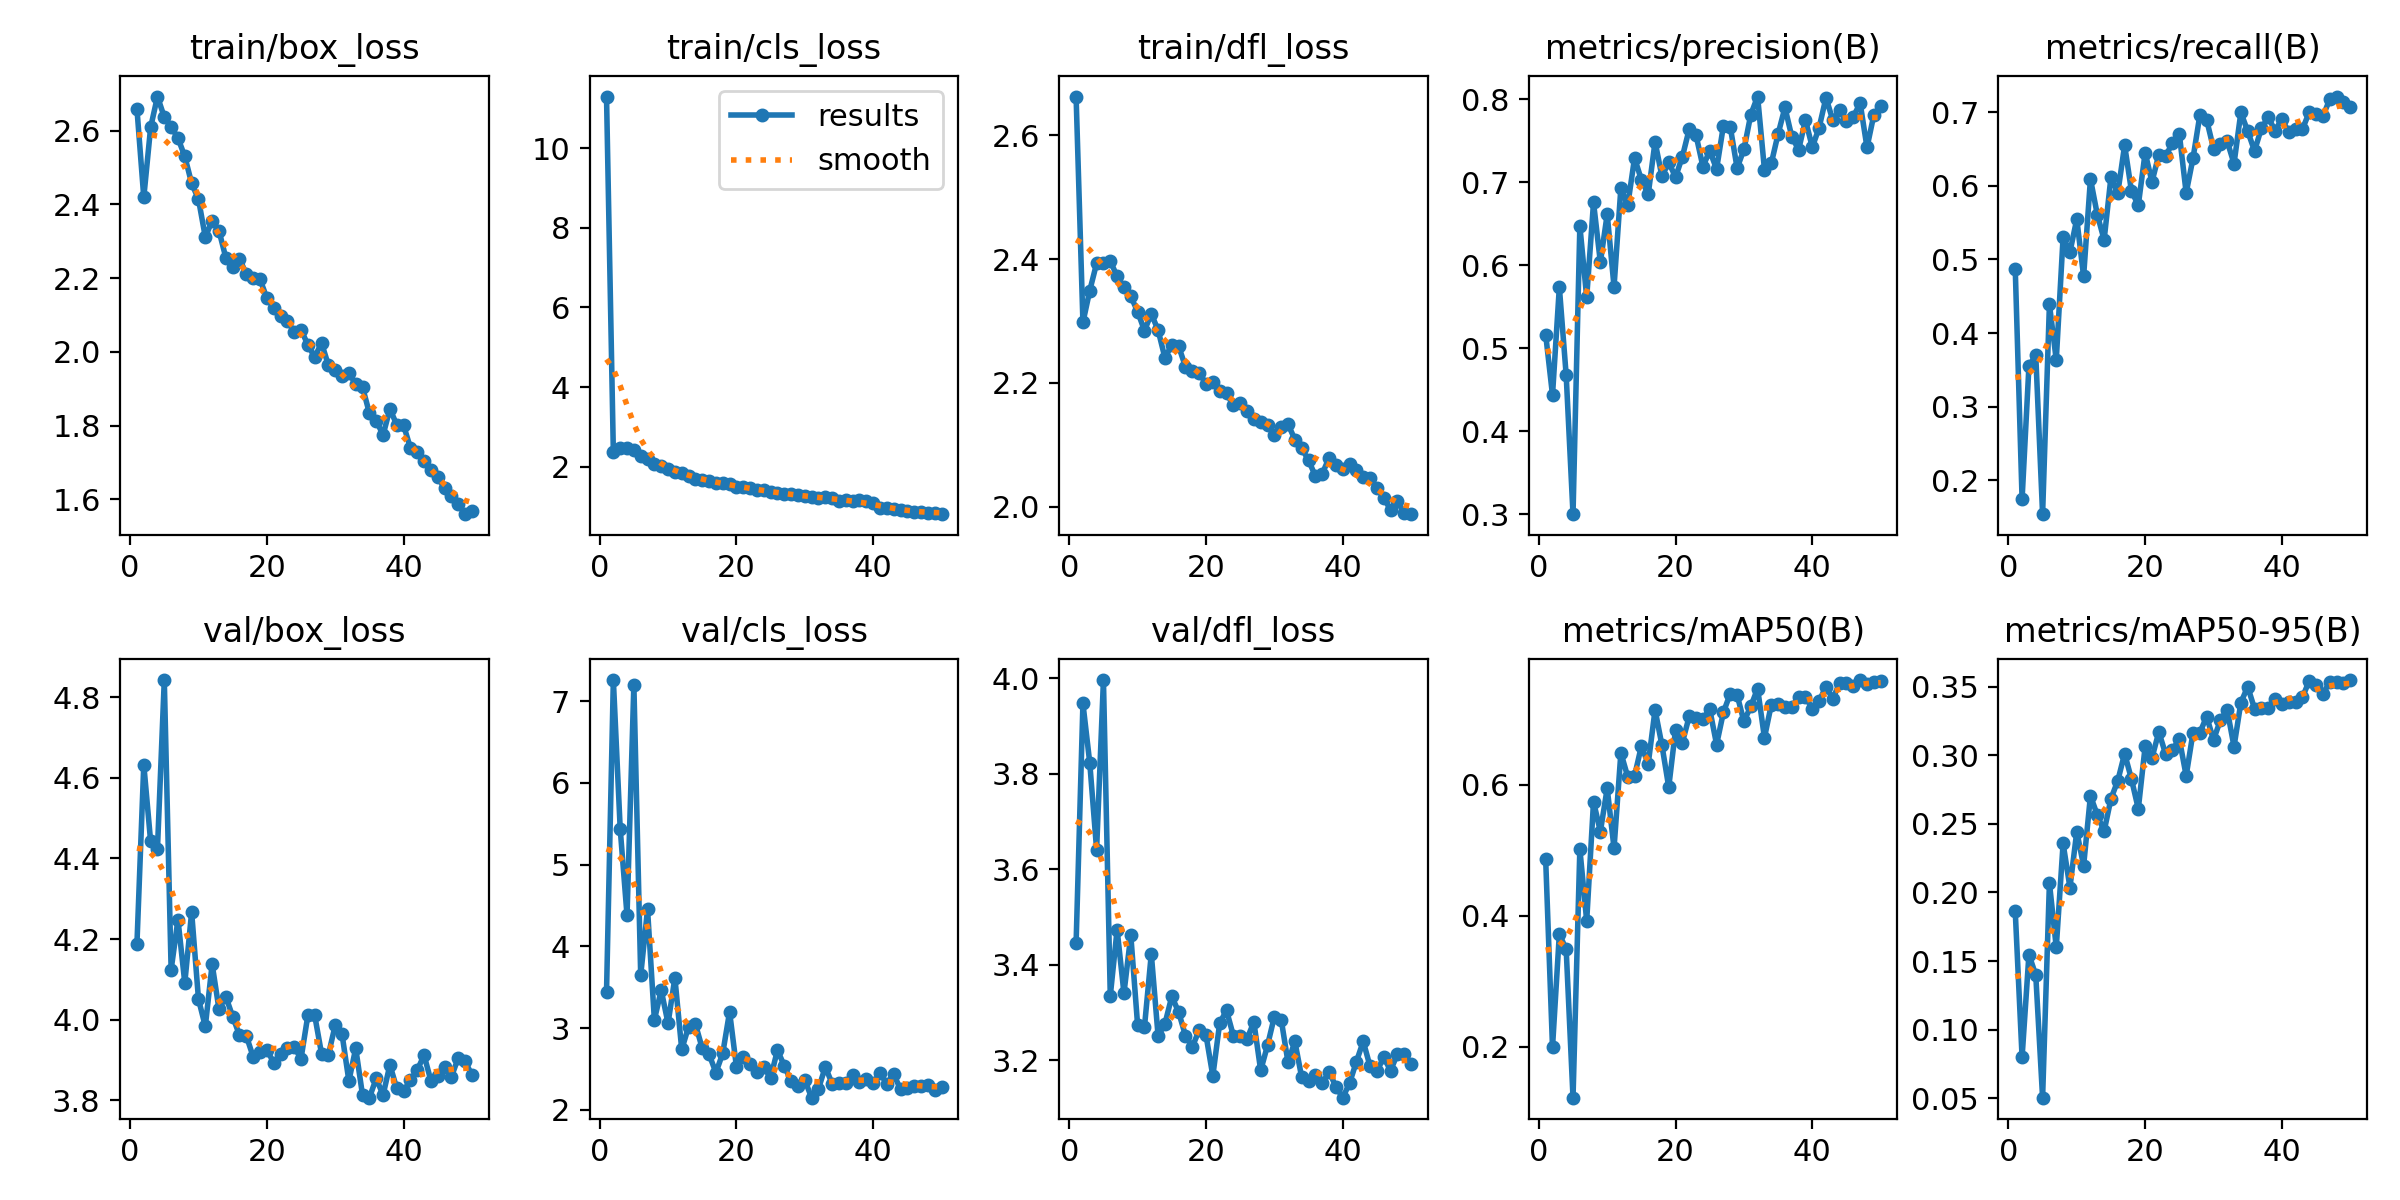

In [ ]:
from IPython.display import Image
Image(filename="pothole_exp/yolov10s_exp1/results.png")


In [ ]:
from ultralytics import YOLO
import os, cv2, random, time
import pandas as pd
import matplotlib.pyplot as plt


image 1/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0000_jpg.rf.e62dd31f0fa7f17d98426589e78d9d92.jpg: 640x640 2 Pothole-s, 14.9ms
image 2/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0001_jpg.rf.25a333b82f7b18d7d42953d2d9e04b80.jpg: 640x640 3 Pothole-s, 14.9ms
image 3/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0003_jpg.rf.6948adc40197af0e4ae03d10aad4b992.jpg: 640x640 2 Pothole-s, 14.9ms
image 4/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0004_jpg.rf.d57477de1c6b8150d72d22531e689c17.jpg: 640x640 2 Pothole-s, 14.9ms
image 5/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0005_jpg.rf.adaad5c209173bf0ca57d27f25b7ef85.jpg: 640x640 1 Pothole-, 14.9ms
image 6/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0006_jpg.rf.9e269f329a3bc09957f528ec436e7167.jpg: 640x640 2 Pothole-s, 14.8ms
image 7/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0007_jpg.rf.4c587034d

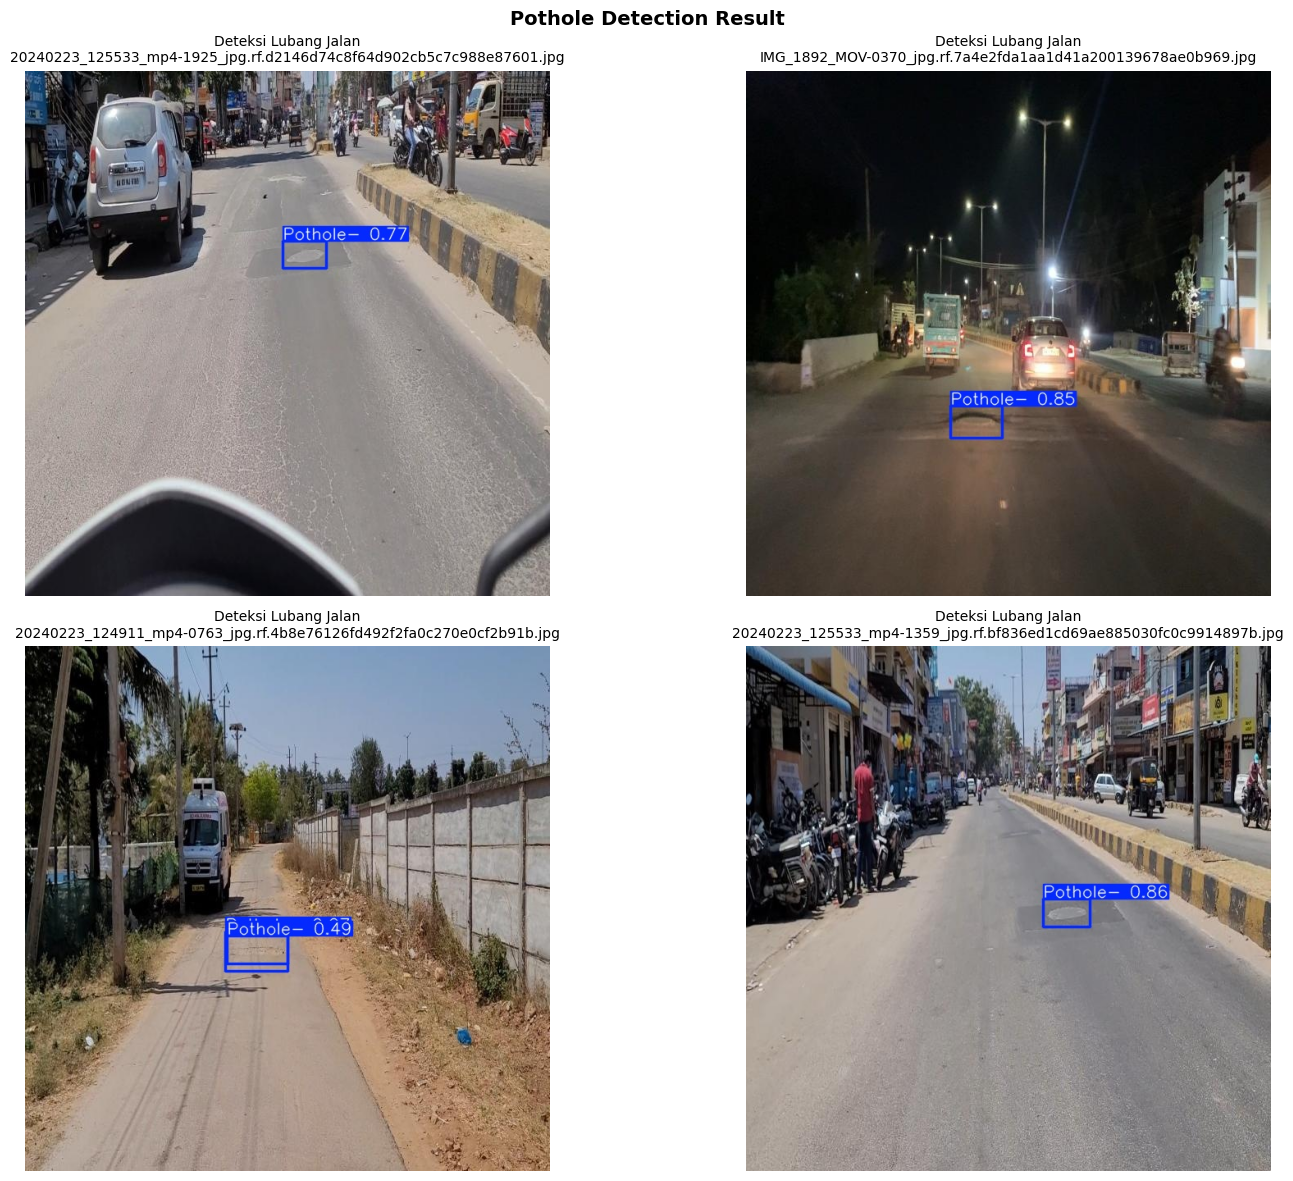

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Jalankan prediksi
pred_results = model.predict(
    source="Pothole-detection-9/test/images",
    conf=0.25,
    save=True,
    project="pothole_exp",
    name="yolov10s_combo1",
    show=False
)

# 2️⃣ Path hasil prediksi (folder output YOLO)
output_dir = "pothole_exp/yolov10s_combo1"  # sesuaikan dengan hasilmu
print(f"📁 Folder hasil deteksi: {output_dir}")

# 3️⃣ Cek file hasil deteksi
print("Contoh file hasil:", os.listdir(output_dir)[:5])

# 4️⃣ Pilih gambar hasil untuk divisualisasikan
sample_images = [
    "20240223_125533_mp4-1925_jpg.rf.d2146d74c8f64d902cb5c7c988e87601.jpg",
    "IMG_1892_MOV-0370_jpg.rf.7a4e2fda1aa1d41a200139678ae0b969.jpg",
    "20240223_124911_mp4-0763_jpg.rf.4b8e76126fd492f2fa0c270e0cf2b91b.jpg",
    "20240223_125533_mp4-1359_jpg.rf.bf836ed1cd69ae885030fc0c9914897b.jpg",
]

# 5️⃣ Visualisasikan
plt.figure(figsize=(16, 12))
for i, img_file in enumerate(sample_images):
    img_path = os.path.join(output_dir, img_file)
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Deteksi Lubang Jalan\n{img_file}", fontsize=10)
    else:
        print(f"⚠️ Gambar {img_file} tidak ditemukan di {output_dir}")

plt.suptitle("Pothole Detection Result", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


# Save Model YOLOv10 Architecture

Bagian ini menjelaskan proses penyimpanan model YOLOv10 beserta bobot terbaik yang diperoleh selama pelatihan. Model yang disimpan digunakan untuk evaluasi lanjutan, perbandingan antar model, serta reproduksibilitas eksperimen.

In [ ]:
from ultralytics import YOLO

# Load model hasil training terbaik
model = YOLO("pothole_exp/yolov10_poc/weights/best.pt")

# Export ke format ONNX
model.export(format="onnx")


Ultralytics 8.3.212 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv10s summary (fused): 106 layers, 7,218,387 parameters, 0 gradients, 21.4 GFLOPs

PyTorch: starting from 'pothole_exp/yolov10_poc/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (15.8 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 1.5s, saved as 'pothole_exp/yolov10_poc/weights/best.onnx' (27.8 MB)

Export complete (2.5s)
Results saved to /content/pothole_exp/yolov10_poc/weights
Predict:         yolo predict task=detect model=pothole_exp/yolov10_poc/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=pothole_exp/yolov10_poc/weights/best.onnx imgsz=640 data=Pothole-detection-9/data.yaml  
Visualize:       https://netron.app


'pothole_exp/yolov10_poc/weights/best.onnx'

In [ ]:
!pip install onnx onnx2tf tensorflow==2.18.0


In [ ]:
import onnx
from onnx2keras import onnx_to_keras
from tensorflow.keras.models import save_model

# 1️⃣ Load file ONNX
onnx_model = onnx.load("best.onnx")

# 2️⃣ Konversi ke model Keras
# node_names menentukan input dari model ONNX (biasanya ['images'])
keras_model = onnx_to_keras(onnx_model, ['images'], name_policy='renumerate')

# 3️⃣ Simpan dalam format .h5
keras_model.save("best_yolov11.h5")
print("✅ Model berhasil disimpan sebagai best_yolov11.h5")


ModuleNotFoundError: No module named 'onnx2keras'

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("best_tf_model")
model.save("best_yolov11.h5")
print("✅ Model berhasil disimpan sebagai best_yolov11.h5")


ValueError: File format not supported: filepath=best_tf_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(best_tf_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).